In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential

# MNIST 로딩 (라벨은 필요없기 때문에 버림)
(x_train, _), (x_test, _) = mnist.load_data()

# 데이터 정규화 및 Reshape
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 784))
x_test = np.reshape(x_test, (len(x_test), 784))

# 원본데이터에 Noise 추가
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Noise가 추가된 데이터 확인
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 모형 구성
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=784))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(784, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')

# 모형 학습
model.fit(x_train_noisy, x_train, 
          nb_epoch=100,
          batch_size=256,
          shuffle=True,
          validation_data=(x_test_noisy, x_test))

# 결과 확인


Using TensorFlow backend.


<Figure size 2000x200 with 9 Axes>

D:\anaconda\lib\site-packages\ipykernel_launcher.py:49: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.2667 - val_loss: 0.2087
Epoch 2/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.1878 - val_loss: 0.1712
Epoch 3/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.1652 - val_loss: 0.1592
Epoch 4/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.1559 - val_loss: 0.1509
Epoch 5/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.1492 - val_loss: 0.1466
Epoch 6/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.1446 - val_loss: 0.1417
Epoch 7/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.1409 - val_loss: 0.1391
Epoch 8/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.1382 - val_loss: 0.1364
Epoch 9/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.1358 - val_loss: 0.1

<Figure size 2000x600 with 27 Axes>

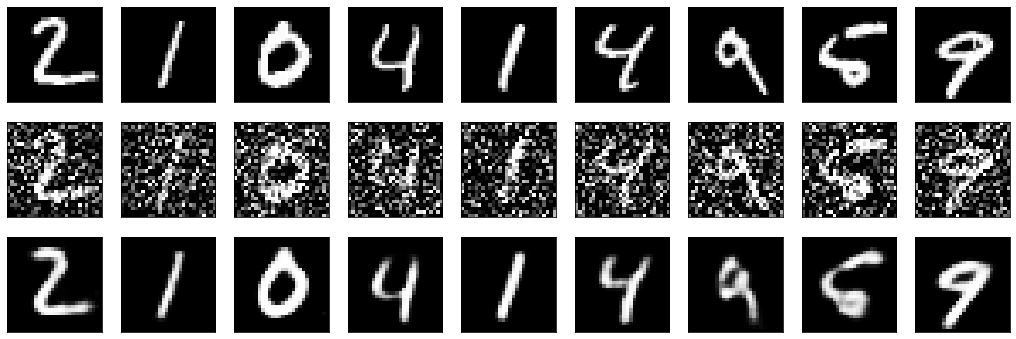

In [2]:
decoded_imgs = model.predict(x_test)
n = 10
plt.figure(figsize=(20, 6))
for i in range(1, n):
    # display original
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display noisy
    ax = plt.subplot(3, n, i + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()